In [570]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [571]:
train = pd.read_csv('../test_and_train_installs/train_data_encoded.csv')
test = pd.read_csv('../test_and_train_installs/test_data_encoded.csv')

ref_hashes_train = train['ref_hash']
del train['ref_hash']

In [572]:
Xtrain, ytrain = train.iloc[:,:-1],train.iloc[:,-1]

In [573]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
                colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [574]:
# Entrenamiento
xg_reg.fit(Xtrain,ytrain)

/home/santiago/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/santiago/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [575]:
targets = pd.read_csv('../datos/target_competencia_ids.csv')

In [576]:
test['ref_hash'] = test['ref_hash'].astype(str) + '_sc'
test['ref_hash'] = test['ref_hash'].astype('object')

In [577]:
merged_test_targets = targets.merge(test, on='ref_hash', how='left').drop('obj', axis=1)

In [578]:
installs_merged = merged_test_targets.loc[merged_test_targets['ref_hash'].str.contains("_sc")]

In [579]:
installs_merged['time_to_install'].fillna(259200, inplace=True)

/home/santiago/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [580]:
ref_hashes_installs_merged = installs_merged['ref_hash']
del installs_merged['ref_hash']

Xtest, ytest = installs_merged.iloc[:,:-1], installs_merged.iloc[:,-1]

In [581]:
df_ytest = pd.DataFrame(ytest)
df_ytest.reset_index(inplace=True)
del df_ytest['index']

In [582]:
Xtest.reset_index(inplace=True)
del Xtest['index']

In [583]:
# Prediccion
preds = xg_reg.predict(Xtest)

In [584]:
df_preds = pd.DataFrame(preds)
df_preds['ytest'] = df_ytest['time_to_install']
df_preds

,0,ytest
0,84612.000000,29646.1780
1,83313.382812,259200.0000
2,83761.312500,247044.3875
3,85292.296875,4844.0530
4,83313.382812,259200.0000
5,83313.382812,259200.0000
6,83313.382812,259200.0000
7,83313.382812,259200.0000
8,83913.179688,5657.6230
9,83313.382812,259200.0000


In [585]:
# Error RMSE
rmse = np.sqrt(mean_squared_error(ytest, preds))
print("RMSE: %f" % (rmse))

RMSE: 151319.932806


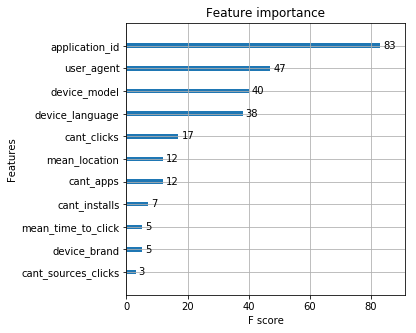

In [586]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [587]:
df = pd.DataFrame(ref_hashes_installs_merged)
df['predictions'] = preds
df.to_csv('../submit_kaggle/pred_installs.csv', index=False)
df

,ref_hash,predictions
0,1000169251625791246_sc,84612.000000
2,1000395625957344683_sc,83313.382812
4,1003027494996471685_sc,83761.312500
6,1006670001679961544_sc,85292.296875
8,1007573308966476713_sc,83313.382812
10,1010070503877148763_sc,83313.382812
12,1010265377387765028_sc,83313.382812
14,1010531372912327058_sc,83313.382812
16,1011610998357271358_sc,83913.179688
18,1013543838965040946_sc,83313.382812
